In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
from operator import itemgetter

In [2]:
train = pd.read_csv('mnistTrain.csv', header = None)
test = pd.read_csv('mnistTest.csv', header = None)

In [3]:
testTarget = test.iloc[:,-1]
testImage = test.iloc[:,0:-1]
trainTarget = train.iloc[:,-1]
trainImage = train.iloc[:,0:-1]

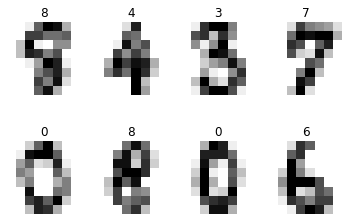

In [4]:
for index, row in train.head(8).iterrows():
    image = []
    for i in range(8):
        image.append(row[i*8:(i+1)*8])
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % row[64])